# 概要

$H_2$最適化問題をLMIを用いて解く。

## おまじないHere
$$
\newcommand{\bm}[1]{{\bf #1}}
\newcommand{\eq}[1]{Eq.(\ref{eq:#1})}
\newcommand{\zu}[1]{図\ref{fig:#1}}
\newcommand{\shiki}[1]{式(\ref{eq:#1})}
\newcommand{\fig}[1]{Fig.\ \ref{fig:#1}}
\newcommand{\grp}[1]{Fig.\ \ref{grp:#1}}
\newcommand{\tab}[1]{Table\ \ref{tab:#1}}
\newcommand{\defeq}{:=}
\newcommand{\tvec}[1]{\bvec{#1}^{\mathsf{T}}} 
\newcommand{\mr}[1]{\mathrm{#1}}%rm体
\newcommand{\ml}[1]{\mathcal{#1}}%frac体
\newcommand{\bmat}[1]{\begin{bmatrix} #1 \end{bmatrix}}%行列簡略化
\newcommand{\pmat}[1]{\begin{pmatrix} #1 \end{pmatrix}}%行列簡略化
\newcommand{\mat}[1]{\left( \begin{matrix} #1 \end{matrix} \right)}%行列簡略化
%\newcommand{\nom}[1]{ \ml{N} \{ 0,\sigma_{ #1 } \} }
\newcommand{\expo}[1]{ \mathrm{e}^{#1} }
$$

Texプリアンブル＋Yalmipの初期設定記述箇所。

addpathでSeDumiやSDpt3などのソルバをインストール。


In [2]:
%%html
<style>
#notebook-container {
    width: 90%;
    background-color: #EEE
}

.code_cell {
   flex-direction: row !important;
}

.code_cell .output_wrapper {
    width: 50%;
    background-color: #FFF
}

.code_cell .input {
    width: 50%;
    background-color: #FFF
}
</style>

In [3]:
addpath(genpath('C:\Users\hkedw\Documents\MATLAB\SeDuMi_1_3'))
addpath(genpath('C:\Users\hkedw\Documents\MATLAB\SDpt3-4.0'))
addpath(genpath('C:\Users\hkedw\Documents\MATLAB\YALMIP-master'))


# H2ノルム

以下の系におけるH2ノルムは
$$
x_{k+1}=Ax_{k}+Bu_{k}\\
y_{k}=Cx_{k}+Du_{k}
$$
次のようになる。

$$
||G||_2^2 = \mbox{trace}(D^\top D+B^\top  P_0B) \\
\mbox{while,}\  P_0 = A^\top P_0 A + C^\top C
$$

直感的には，
- The energy of the impulse response
- The energy of the response to initial conditions
- The (expected) power of the response to white noise
などだろう


In [42]:
% ----------
J  = 0.0712;  M  = 0.390;  mu = 0.695;
l  = 0.204;   g  = 9.81;

A_c = [     0      1
      -M*g*l/J  -mu/J ];
B_c = [  0
      1/J ];
C_c = [1 0];
D_c = [0];

%% system analysys
s = tf('s')
minreal(C_c*inv(s*eye(2) -A_c)*B_c)
tf(ss(A_c,B_c,C_c,D_c))

rank(obsv(A_c,C_c))
eig(A_c)

ST = 1e-3;
sys_d = c2d(ss(A_c,B_c,C_c,D_c),ST)
A = sys_d.A;
B = sys_d.B;
C = sys_d.C;
D = sys_d.D;


s =
 
  s
 
連続時間の伝達関数です。


ans =
 
          14.04
  ---------------------
  s^2 + 9.761 s + 10.96
 
連続時間の伝達関数です。


ans =
 
          14.04
  ---------------------
  s^2 + 9.761 s + 10.96
 
連続時間の伝達関数です。


ans =

     2


ans =

   -1.2947
   -8.4665


sys_d =
 
  A = 
              x1         x2
   x1          1  0.0009951
   x2   -0.01091     0.9903
 
  B = 
            u1
   x1    7e-06
   x2  0.01398
 
  C = 
       x1  x2
   y1   1   0
 
  D = 
       u1
   y1   0
 
サンプル時間:  0.001 seconds
離散時間状態空間モデル。




In [50]:
% matlab function 

H2norm_square= norm(sys_d,2)^2


H2norm_square =

   9.2177e-04




In [49]:
%% calculation with dlyap
P0 = dlyap(A',C'*C)
confirmP0 = A'*P0*A+C'*C

X0 = dlyap(A,B*B')
confirmX0 = A*X0*A'+B*B'

H2_square = trace(D'*D+B'*P0*B)
H2_square = trace(D*D'+C*X0*C')


P0 =

  496.9598   45.6127
   45.6127    4.6728


confirmP0 =

  496.9598   45.6127
   45.6127    4.6728


X0 =

    0.0009    0.0000
    0.0000    0.0101


confirmX0 =

    0.0009    0.0000
    0.0000    0.0101


H2_square =

   9.2177e-04


H2_square =

   9.2177e-04




## LMI に依るH2ノルム導出

$H_2$norm が$||G||_2<\gamma$を満たす時，

その必要十分条件は，

$$
A^\top PA-P+C^\top C \prec 0 \\
Z - D^\top D - B^\top P B \succ 0\\
trace(Z)<\gamma^2
$$
となる。これをschurの補題を適用して得られるLMI条件は，$P,Z$に関して

$$
\bmat{A^\top P A - P & C^\top\\
C & - I} \prec 0\\
\bmat{Z - B^\top P B & D^\top\\
D &  I} \succ 0\\
trace(Z) < \gamma
$$

となる。


教科書によると以下の様に変形したものもある。何が違うのか。ステップ数も変わらなかったので不透明である。

$$
\bmat{A^\top P A - P & C^\top\\
C & -\gamma I} \prec 0\\
\bmat{Z - B^\top P B & D^\top\\
D & \gamma I} \succ 0\\
trace(Z) < \gamma
$$

この場合最適化される$P$は$P_0$と異なることに注意されたい。

In [58]:
%% pattern1
row=size(A,1);col=size(A,2);


P = sdpvar(row,col,'symmetric')
Z = sdpvar(1,1,'symmetric')
gamma = sdpvar(1)

LMI = [];
LMI = [LMI, [A'*P*A-P C';C -eye(1)]<0 ];
LMI = [LMI, [Z-B'*P*B D';D eye(1)]>0 ];
LMI = [LMI, trace(Z)<gamma];

sol1=solvesdp(LMI,gamma);

LMI_H2_sq = double(gamma)
LMI_H2P0 = double(P)


Linear matrix variable 2x2 (symmetric, real, 3 variables)
Linear scalar (real, 1 variable)
Linear scalar (real, 1 variable)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In > (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
SeDuMi 1.3 by AdvOL, 2005-2008 and Jos F. Sturm, 1998-2003.
Alg = 2: xz-corrector, theta = 0.250, beta = 0.500
eqs m = 5, order n = 7, dim = 15, blocks = 3
nnz(A) = 15 + 0, nnz(ADA) = 19, nnz(L) = 12
 it :     b*y       gap    delta  rate   t/tP*  t/tD*   feas cg cg  prec
  0 :            4.02E+00 0.000
  1 :  -4.97E-02 8.93E-01 0.000 0.2218 0.9000 0.9000   1.75  1  1  1.2E+00
  2 :   2.59E-03 3.35E-02 0.000 0.0375 0.9900 0.9900   1.30  1  1  5.7E-01
  3 :  -3.35E-03 2.08E-03 0.000 0.0620 0.9900 0.9900   1.26  1  1  3.6E-01
  4 :  -9.64E-04 6.31E-05 0.000 0.0304 0.9900 0.9900

In [59]:
%% pattern2 
row=size(A,1);col=size(A,2);


P = sdpvar(row,col,'symmetric')
Z = sdpvar(1,1,'symmetric')
gamma = sdpvar(1)

LMI = [];
LMI = [LMI, [A'*P*A-P C';C -gamma*eye(1)]<0 ];
LMI = [LMI, [Z-B'*P*B D';D gamma*eye(1)]>0 ];
LMI = [LMI, trace(Z)<gamma];

sol2=solvesdp(LMI,gamma);

LMI_H2_sq = double(gamma)^2


Linear matrix variable 2x2 (symmetric, real, 3 variables)
Linear scalar (real, 1 variable)
Linear scalar (real, 1 variable)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In > (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
SeDuMi 1.3 by AdvOL, 2005-2008 and Jos F. Sturm, 1998-2003.
Alg = 2: xz-corrector, theta = 0.250, beta = 0.500
eqs m = 5, order n = 7, dim = 15, blocks = 3
nnz(A) = 17 + 0, nnz(ADA) = 25, nnz(L) = 15
 it :     b*y       gap    delta  rate   t/tP*  t/tD*   feas cg cg  prec
  0 :            4.02E+00 0.000
  1 :  -1.21E+00 1.28E+00 0.000 0.3178 0.9000 0.9000   1.42  1  1  2.2E+00
  2 :  -4.37E-01 3.17E-01 0.000 0.2480 0.9000 0.9000   1.98  1  1  4.1E-01
  3 :  -2.47E-01 9.13E-02 0.000 0.2880 0.9000 0.9000   0.96  1  1  1.5E-01
  4 :  -1.29E-01 2.36E-02 0.000 0.2583 0.9000 0.9000

In [65]:
%% pattern3

X = sdpvar(row,col,'symmetric')
W = sdpvar(1,1,'symmetric')
gamma = sdpvar(1)

LMI = [];
LMI = [LMI, [A*X*A'-X B;B' -eye(1)]<0 ];
LMI = [LMI, [W-C*X*C' D;D' eye(1)]>0 ];
LMI = [LMI, trace(W)<gamma];

sol3=solvesdp(LMI,gamma);


LMI_H2_sq = double(gamma)


Linear matrix variable 2x2 (symmetric, real, 3 variables)
Linear scalar (real, 1 variable)
Linear scalar (real, 1 variable)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In > (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
SeDuMi 1.3 by AdvOL, 2005-2008 and Jos F. Sturm, 1998-2003.
Alg = 2: xz-corrector, theta = 0.250, beta = 0.500
eqs m = 5, order n = 7, dim = 15, blocks = 3
nnz(A) = 13 + 0, nnz(ADA) = 15, nnz(L) = 10
 it :     b*y       gap    delta  rate   t/tP*  t/tD*   feas cg cg  prec
  0 :            5.14E+00 0.000
  1 :   2.92E+02 1.16E-01 0.000 0.0226 0.9900 0.9900  -0.99  1  1  3.4E+00
  2 :   2.48E+02 4.99E-02 0.000 0.4299 0.9000 0.9000  -0.38  1  1  1.9E+00
  3 :   2.69E+01 1.47E-02 0.000 0.2935 0.9000 0.9000   1.36  1  1  4.3E-01
  4 :   3.96E-01 3.71E-04 0.000 0.0254 0.9900 0.9900

## BMIとして解こうとするやつ

ソルバがないらしい。

In [70]:

X = sdpvar(row,col,'symmetric')
W = sdpvar(1,1,'symmetric')
K = sdpvar(2,1)
gamma = sdpvar(1)

BMI = [];
BMI = [BMI, [(A-K*C*A)*X*(A-K*C*A)'-X K;K' -eye(1)]<0 ];
BMI = [BMI, [W-[1,0]*X*[1,0]' D;D' eye(1)]>0 ];
BMI = [BMI, trace(W)<gamma];

options = sdpsettings('solver','bmibnb');
optimize(BMI,gamma,options)

Linear matrix variable 2x2 (symmetric, real, 3 variables)
Linear scalar (real, 1 variable)
Linear matrix variable 2x1 (full, real, 2 variables)
Linear scalar (real, 1 variable)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In > (line 12)
警告: Strict inequalities are not supported. A non-strict has been added instead')
> In < (line 12)

ans = 

  フィールドをもつ struct:

    solvertime: 0
          info: 'No suitable solver'
       problem: -2
    yalmiptime: 0.0360




In [67]:
%% BMI test
x1 = sdpvar(1,1);
x2 = sdpvar(1,1);
x3 = sdpvar(1,1);
p = -2*x1+x2-x3;
F = [x1*(4*x1-4*x2+4*x3-20)+x2*(2*x2-2*x3+9)+x3*(2*x3-13)+24>=0,
     4-(x1+x2+x3)>=0,
      6-(3*x2+x3)>=0,
               x1>=0,
             2-x1>=0,
               x2>=0,
               x3>=0,
             3-x3>=0]

options = sdpsettings('solver','bmibnb');
optimize(F,p,options);

++++++++++++++++++++++++++++++++++++++++++++++++++
|   ID|                                Constraint|
++++++++++++++++++++++++++++++++++++++++++++++++++
|   #1|   Element-wise inequality (quadratic) 1x1|
|   #2|               Element-wise inequality 1x1|
|   #3|               Element-wise inequality 1x1|
|   #4|               Element-wise inequality 1x1|
|   #5|               Element-wise inequality 1x1|
|   #6|               Element-wise inequality 1x1|
|   #7|               Element-wise inequality 1x1|
|   #8|               Element-wise inequality 1x1|
++++++++++++++++++++++++++++++++++++++++++++++++++
* Starting YALMIP global branch & bound.
* Branch-variables : 3
* Upper solver     : fmincon
* Lower solver     : LINPROG
* LP solver        : LINPROG
 Node       Upper      Gap(%)       Lower    Open
    1 :   -4.000E+00    33.33     -6.000E+00   2  Improved solution  
    2 :   -4.000E+00    33.33     -6.000E+00   3    
    3 :   -4.000E+00    15.57     -4.844E+00   4    
    4 :   -

## H2最適化問題

一般化プラントに対してフィードバック制御系を設計することを考える。


$$
\begin{array}{l}{\dot{x}(t)=A x(t)+B_{w} w(t)+B_{u} u(t), \quad x(0)=x_{0}} \\ {z(t)=C_{z} x(t)+D_{z w} w(t)+D_{z u} u(t)} \\ {y(t)=C_{y} x(t)+D_{y w} w(t)+D_{y u} u(t)}\end{array}
$$



In [80]:
A
C


A =

    1.0000    0.0010
   -0.0109    0.9903


C =

     1     0




# 超原始的に解く

- Poleを決める。離散化する
- Kゲインを決める。
- その後評価関数を決める→Optimalかどうかはわからんが…

Sampling: 1ms
Speed : 25Hz
重根 VS 他の配置

結果は重根の方が良かった。うーん。


In [99]:
RealPart =1*2*pi;
len = 100;

Ks = zeros(2,len);
Pends = zeros(2,len);
Omega = diag([0.1]);

for i = 1:len

c_pole = [i*1j,-i*1j]-RealPart;

d_pole = exp(ST*c_pole);
K = place(A',A'*C',d_pole)';
Ks(:,i) = K;

Pend=dlyap(A-K*C*A,K*Omega*K');
Pends(:,i)=reshape(diag(Pend),2,1);

end

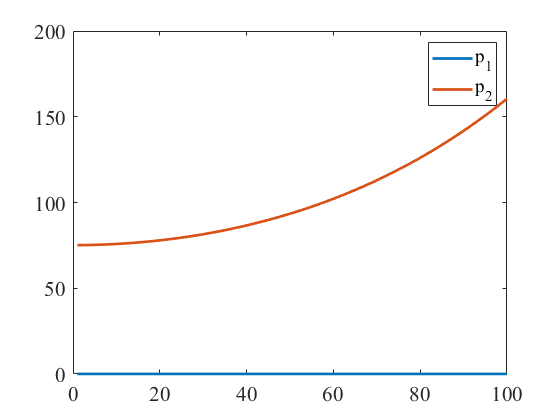

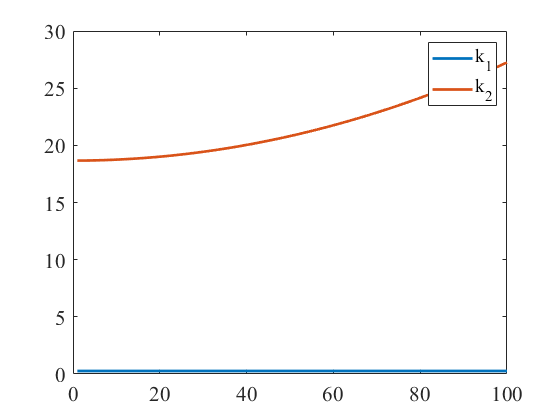

In [92]:
%% for 25Hz do not touch!
figure
xl = reshape(1:len,len,1);
plot(xl,Ks')
legend('k_1','k_2')

figure
plot(xl,Pends')
legend('p_1','p_2')


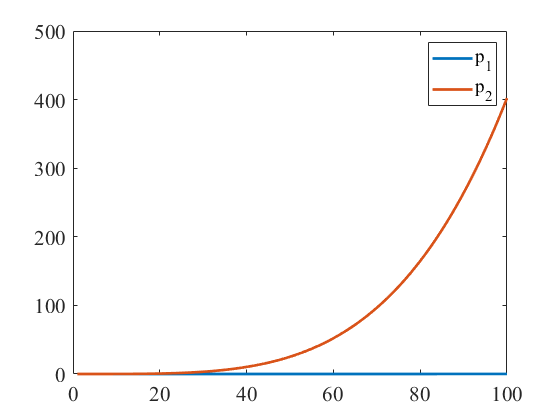

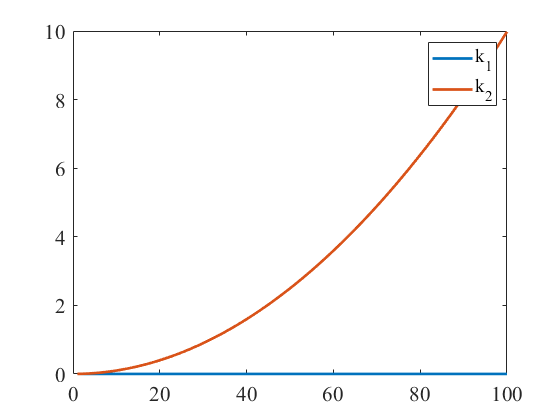

In [100]:
%% for 1Hz do not touch!
figure
xl = reshape(1:len,len,1);
plot(xl,Ks')
legend('k_1','k_2')

figure
plot(xl,Pends')
legend('p_1','p_2')


In [101]:
Pends(:,1:5)


ans =

    0.0001    0.0001    0.0001    0.0002    0.0002
    0.0001    0.0002    0.0005    0.0012    0.0028




In [98]:
[X,L,G,report] = dare(A',C',zeros(size(A)),Omega)


X =

     0     0
     0     0


L =

    0.9987
    0.9916


G =

     0     0


report =

     0


